<h1>Final Analysis - Spectral Power Of Spindles (Only MASS Subject #1)</h1>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing libraries for statistical testing:
from scipy.stats import ttest_ind

<h2>Importing The Dataset + Preprocessing</h2>

In [6]:
# Absolute filepath for the spindle dataset (for MASS #1)
filepath = r"C:\Users\Jason Ha\Documents\University\4th Year\Thesis Project (Repo)\Jupyter Notebooks\Active Projects\sdt.csv"

# Load the dataset as a pandas dataframe into workspace
df = pd.read_csv(filepath)

# View the first 5 rows of the dataframe:
df.head(5)

,a,b,c,d,e,f,qps_energy,real_energy,residual_energy,qser,rser,energy_error_percent,real_freq_hz,qps_freq_hz,freq_error_percent,raw_qps_corrcoeff,sdt_ratio,label
0,1.325652,9.716382,-26.859875,-2.833171,89.664042,-6.664296,2541.664544,20234.58525,268.922368,0.125610,0.013290,87.439008,14.336918,14.270475,0.463434,0.950960,0.340984,0
1,1.468553,-2.742548,-3.764752,21.437101,90.479274,7.496630,2874.578101,63598.53703,415.036250,0.045199,0.006526,95.480119,14.336918,14.400224,0.441560,0.934775,0.442130,0
2,0.525262,-1.139067,0.742051,-2.524328,87.725340,-15.234743,497.165205,79060.31861,333.878925,0.006288,0.004223,99.371157,15.360983,13.961922,9.107891,0.773619,0.153423,0
3,1.830789,-0.153870,-7.142737,-2.241972,74.768194,3.799330,2320.307933,112770.89370,132.430565,0.020575,0.001174,97.942459,12.288786,11.899728,3.165966,0.972698,0.133589,0
4,-2.333735,-23.980179,-35.672175,0.123019,95.521514,29.813112,770.847017,136731.37410,231.992380,0.005638,0.001697,99.436233,14.336918,15.202721,6.038979,0.876702,0.114632,0


In [13]:
len(df[df['label'] == 0])

378865

<h3>Analysis With ONLY QPS Parameters</h3>

In [8]:
# Pull out all columns ONLY associated with the QPS parameters and the SDT ratio
params = ['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio', 'label']

# Create a fresh dataframe for ONLY QPS parameters:
df_qps = df[params]
df_qps.head(5)

,a,b,c,d,e,f,sdt_ratio,label
0,1.325652,9.716382,-26.859875,-2.833171,89.664042,-6.664296,0.340984,0
1,1.468553,-2.742548,-3.764752,21.437101,90.479274,7.496630,0.442130,0
2,0.525262,-1.139067,0.742051,-2.524328,87.725340,-15.234743,0.153423,0
3,1.830789,-0.153870,-7.142737,-2.241972,74.768194,3.799330,0.133589,0
4,-2.333735,-23.980179,-35.672175,0.123019,95.521514,29.813112,0.114632,0


In [9]:
df_qps[df_qps['label'] == 1].describe()

,a,b,c,d,e,f,sdt_ratio,label
count,13553.000000,13553.000000,13553.000000,1.355300e+04,13553.000000,13553.000000,13553.000000,13553.0
mean,0.216080,-0.599694,-10.368358,9.098149e+06,63.352129,0.591355,0.395644,1.0
std,2.078104,9.220868,16.322131,1.997112e+07,36.407318,14.434780,0.328187,0.0
min,-50.000000,-193.355292,-235.544701,-7.208346e+07,-129.645223,-162.042581,0.013169,1.0
25%,-0.770527,-2.088367,-14.673543,-1.221341e+00,69.009806,-4.852621,0.188833,1.0
50%,0.624751,-0.484645,-5.165916,6.582247e-01,79.888018,0.000000,0.315785,1.0
75%,1.381995,0.790703,-0.790167,3.049572e+00,85.847456,6.290231,0.497705,1.0
max,3.729116,221.854742,47.916777,7.372272e+07,138.052429,179.838044,5.082433,1.0


<h3>T-Test Between QPS Features</h3>

Using the spindle and non-spindle datasets, we can perform the t-test for each column of both of the datasets

In [10]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [12]:
len(non_spindles)

13553

In [14]:
list_params = ['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio']
p = {}

for param in list_params:
    (_, p[param]) = ttest_ind(spindles[param], non_spindles[param])

# Print out the p-values for each parameter:
for param in list_params:
    print("Parameter {}: p = {}".format(param, p[param]))

Parameter a: p = 3.352973663492127e-05
Parameter b: p = 0.11027052575565605
Parameter c: p = 1.4186804814036488e-06
Parameter d: p = 2.8596057490221405e-98
Parameter e: p = 0.0
Parameter f: p = 0.06541027529427845
Parameter sdt_ratio: p = 0.06591410278427842


From the $p$-values above, the best features we can use that exhibit the greatest statistics difference are parameters $a, c, d$ and $e$

<h2>Preliminary Classification Using Neural Networks</h2>

In [15]:
# Split dataset into spindle and non-spindles:
# Randomise the non-spindle set and truncate so equal in length to the spindle set:
spindles = df_qps[df_qps['label'] == 1]
non_spindles = df_qps[df_qps['label'] == 0].sample(frac=1).reset_index(drop = True)

# Truncate non-spindles:
non_spindles = non_spindles.iloc[0:len(spindles), :]

In [16]:
# Concatenate the spindle and non-spindle dataset then jumble once again before splitting into train and test set:
final_df = pd.concat([spindles, non_spindles], axis=0).reset_index(drop=True)

# Split into X and y (feature vectors and label vector):
X = final_df[['a', 'b', 'c', 'd', 'e', 'f', 'sdt_ratio']]
y = final_df['label']

In [17]:
X.head()

,a,b,c,d,e,f,sdt_ratio
0,2.296451,-7.155485,-12.919155,-1.196954,76.286337,-23.243314,0.322699
1,0.451674,0.666874,-2.259155,-1.978493,101.151664,-16.079055,0.204101
2,1.070602,0.569831,-0.350501,-2.279199,81.386556,9.123053,0.220538
3,0.780771,-6.717588,-3.755725,-0.755665,75.280707,114.281282,0.242375
4,0.329640,0.846617,-4.358997,-0.927441,90.505332,-0.917106,0.098359


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1785 samples, validate on 447 samples
Epoch 1/250
1785/1785 [==============================] - 1s 352us/step - loss: 0.5676 - acc: 0.8717 - val_loss: 0.4108 - val_acc: 0.9597
Epoch 2/250
1785/1785 [==============================] - 0s 64us/step - loss: 0.2961 - acc: 0.9423 - val_loss: 0.1658 - val_acc: 0.9687
Epoch 3/250
1785/1785 [==============================] - 0s 61us/step - loss: 0.1662 - acc: 0.9485 - val_loss: 0.1283 - val_acc: 0.9664
Epoch 4/250
1785/1785 [==============================] - 0s 68us/step - loss: 0.1213 - acc: 0.9585 - val_loss: 0.1142 - val_acc: 0.9821
Epoch 5/250
1785/1785 [==============================] - 0s 64us/step - loss: 0.1037 - acc: 0.9625 - val_loss: 0.1116 - val_acc: 0.9776
Epoch 6/250
1785/1785 [==============================] - 0s 61us/step - loss: 0.0912 - acc: 0.9630 - val_loss: 0.0932 - val_acc: 0.9821
Epoch 7/250
1785

Epoch 56/250
1785/1785 [==============================] - 0s 62us/step - loss: 0.0238 - acc: 0.9894 - val_loss: 0.0682 - val_acc: 0.9821
Epoch 57/250
1785/1785 [==============================] - 0s 73us/step - loss: 0.0228 - acc: 0.9916 - val_loss: 0.0611 - val_acc: 0.9911
Epoch 58/250
1785/1785 [==============================] - 0s 71us/step - loss: 0.0242 - acc: 0.9905 - val_loss: 0.0621 - val_acc: 0.9843
Epoch 59/250
1785/1785 [==============================] - 0s 69us/step - loss: 0.0249 - acc: 0.9910 - val_loss: 0.0676 - val_acc: 0.9821
Epoch 60/250
1785/1785 [==============================] - 0s 72us/step - loss: 0.0225 - acc: 0.9910 - val_loss: 0.0619 - val_acc: 0.9866
Epoch 61/250
1785/1785 [==============================] - 0s 77us/step - loss: 0.0225 - acc: 0.9905 - val_loss: 0.0652 - val_acc: 0.9843
Epoch 62/250
1785/1785 [==============================] - 0s 67us/step - loss: 0.0225 - acc: 0.9894 - val_loss: 0.0691 - val_acc: 0.9799
Epoch 63/250
1785/1785 [=================

1785/1785 [==============================] - 0s 67us/step - loss: 0.0091 - acc: 0.9961 - val_loss: 0.0754 - val_acc: 0.9799
Epoch 175/250
1785/1785 [==============================] - 0s 71us/step - loss: 0.0112 - acc: 0.9944 - val_loss: 0.0779 - val_acc: 0.9799
Epoch 176/250
1785/1785 [==============================] - 0s 70us/step - loss: 0.0091 - acc: 0.9961 - val_loss: 0.0763 - val_acc: 0.9799
Epoch 177/250
1785/1785 [==============================] - 0s 71us/step - loss: 0.0108 - acc: 0.9950 - val_loss: 0.0708 - val_acc: 0.9866
Epoch 178/250
1785/1785 [==============================] - 0s 76us/step - loss: 0.0097 - acc: 0.9955 - val_loss: 0.0863 - val_acc: 0.9776
Epoch 179/250
1785/1785 [==============================] - 0s 70us/step - loss: 0.0086 - acc: 0.9978 - val_loss: 0.0755 - val_acc: 0.9843
Epoch 180/250
1785/1785 [==============================] - 0s 72us/step - loss: 0.0091 - acc: 0.9961 - val_loss: 0.0823 - val_acc: 0.9799
Epoch 181/250
1785/1785 [=======================

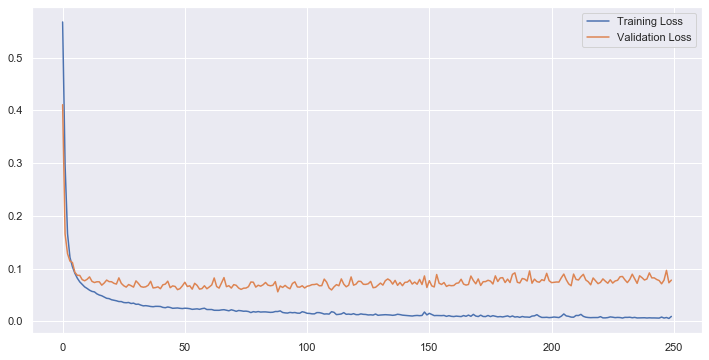

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the 'all_features' dataframe into training and test subsets. CV is performed using 'cross_val_score'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn = Sequential()
model_nn.add(Dense(38, activation='relu', input_dim=7))
model_nn.add(Dense(38, activation='relu'))
model_nn.add(Dense(1, activation='sigmoid'))

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn.fit(X_train, y_train, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_nn.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred = model_nn.predict_classes(X_test)

# Compute each metric:
acc = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)

# Print out the metrics:
print("Accuracy = {}".format(acc))
print("Recall = {}".format(recall))
print("Precision = {}".format(precision))
print("F1 Score = {}".format(f1_score))

Accuracy = 0.9838709677419355
Recall = 0.9793103448275862
Precision = 0.9895470383275261
F1 Score = 0.9844020797227035


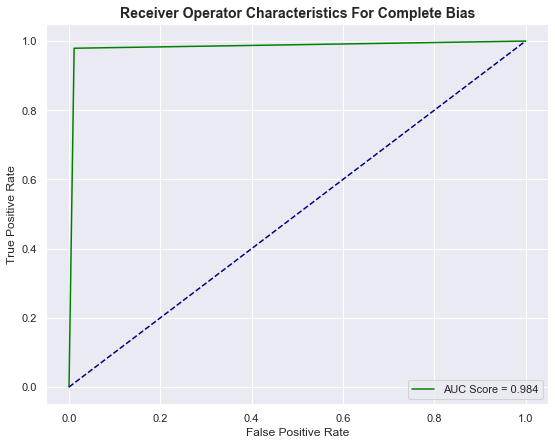

In [20]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr, tpr, thresholds) = roc_curve(y_pred, y_test)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score = auc(fpr, tpr)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr, tpr, color='green', label="AUC Score = {}".format(round(auc_score, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

<h3>After Feature Selection (ONLY THE SDT RATIO)</h3>

In [27]:
# New training and label set:
X_new = final_df[['sdt_ratio']]
y_new = final_df['label']

Train on 1785 samples, validate on 447 samples
Epoch 1/250
1785/1785 [==============================] - 1s 389us/step - loss: 0.6925 - acc: 0.5160 - val_loss: 0.6969 - val_acc: 0.4832
Epoch 2/250
1785/1785 [==============================] - 0s 72us/step - loss: 0.6918 - acc: 0.5154 - val_loss: 0.6992 - val_acc: 0.4474
Epoch 3/250
1785/1785 [==============================] - 0s 71us/step - loss: 0.6919 - acc: 0.5204 - val_loss: 0.6985 - val_acc: 0.4474
Epoch 4/250
1785/1785 [==============================] - 0s 63us/step - loss: 0.6914 - acc: 0.5204 - val_loss: 0.7001 - val_acc: 0.4541
Epoch 5/250
1785/1785 [==============================] - 0s 63us/step - loss: 0.6914 - acc: 0.5227 - val_loss: 0.6999 - val_acc: 0.4541
Epoch 6/250
1785/1785 [==============================] - 0s 73us/step - loss: 0.6916 - acc: 0.5232 - val_loss: 0.6996 - val_acc: 0.4474
Epoch 7/250
1785/1785 [==============================] - 0s 68us/step - loss: 0.6911 - acc: 0.5261 - val_loss: 0.6994 - val_acc: 0.4497


Epoch 120/250
1785/1785 [==============================] - 0s 71us/step - loss: 0.6905 - acc: 0.5328 - val_loss: 0.7024 - val_acc: 0.4362
Epoch 121/250
1785/1785 [==============================] - 0s 75us/step - loss: 0.6905 - acc: 0.5361 - val_loss: 0.7036 - val_acc: 0.4474
Epoch 122/250
1785/1785 [==============================] - 0s 85us/step - loss: 0.6902 - acc: 0.5373 - val_loss: 0.7046 - val_acc: 0.4474
Epoch 123/250
1785/1785 [==============================] - 0s 85us/step - loss: 0.6904 - acc: 0.5272 - val_loss: 0.7033 - val_acc: 0.4340
Epoch 124/250
1785/1785 [==============================] - 0s 84us/step - loss: 0.6902 - acc: 0.5367 - val_loss: 0.7040 - val_acc: 0.4452
Epoch 125/250
1785/1785 [==============================] - 0s 83us/step - loss: 0.6903 - acc: 0.5328 - val_loss: 0.7043 - val_acc: 0.4452
Epoch 126/250
1785/1785 [==============================] - 0s 89us/step - loss: 0.6904 - acc: 0.5389 - val_loss: 0.7027 - val_acc: 0.4362
Epoch 127/250
1785/1785 [=========

1785/1785 [==============================] - 0s 78us/step - loss: 0.6900 - acc: 0.5261 - val_loss: 0.7033 - val_acc: 0.4362
Epoch 239/250
1785/1785 [==============================] - 0s 60us/step - loss: 0.6900 - acc: 0.5266 - val_loss: 0.7050 - val_acc: 0.4407
Epoch 240/250
1785/1785 [==============================] - 0s 67us/step - loss: 0.6904 - acc: 0.5322 - val_loss: 0.7044 - val_acc: 0.4362
Epoch 241/250
1785/1785 [==============================] - 0s 74us/step - loss: 0.6900 - acc: 0.5305 - val_loss: 0.7039 - val_acc: 0.4452
Epoch 242/250
1785/1785 [==============================] - 0s 69us/step - loss: 0.6902 - acc: 0.5350 - val_loss: 0.7052 - val_acc: 0.4474
Epoch 243/250
1785/1785 [==============================] - 0s 77us/step - loss: 0.6898 - acc: 0.5339 - val_loss: 0.7034 - val_acc: 0.4385
Epoch 244/250
1785/1785 [==============================] - 0s 73us/step - loss: 0.6898 - acc: 0.5249 - val_loss: 0.7034 - val_acc: 0.4340
Epoch 245/250
1785/1785 [=======================

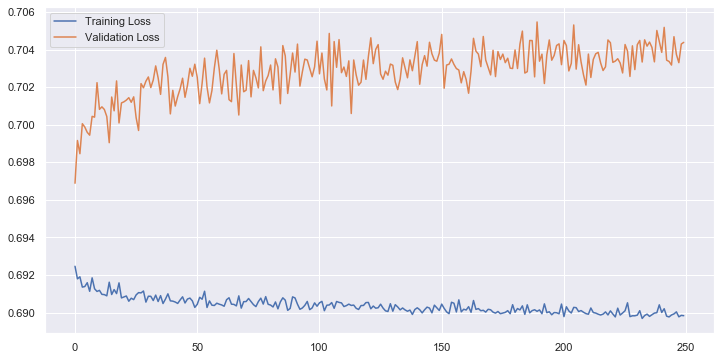

In [28]:
# Train-test splitting:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new)
X_train_new = std_scale.transform(X_train_new)
X_test_new = std_scale.transform(X_test_new)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation

model_nn2 = Sequential()
model_nn2.add(Dense(38, activation='relu', input_dim=1))
model_nn2.add(Dense(38, activation='relu'))
model_nn2.add(Dense(1, activation='sigmoid'))

model_nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn2.fit(X_train_new, y_train_new, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn2.evaluate(X_train_new, y_train_new, verbose=0)
_, test_acc = model_nn2.evaluate(X_test_new, y_test_new, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

The final results after the feature selection show that parameters $a$ and $c$  allow the validation loss to approach a loss of 72.8% and stay within that loss as opposed to growing further like the case with using all features. The final accuracies achieved by the model were:

- Training: 58.7%
- Test: 52.9%

Where the accuracies of both the training and the test set are essentially the same which is much better than having the drastically higher training accuracy than the validation accuracy in the first case which suggests overfitting occurred.

In [29]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred2 = model_nn2.predict_classes(X_test_new)

# Compute each metric:
acc2 = accuracy_score(y_pred2, y_test_new)
recall2 = recall_score(y_pred2, y_test_new)
precision2 = precision_score(y_pred2, y_test_new)
f1_score2 = f1_score(y_pred2, y_test_new)

# Print out the metrics:
print("Accuracy = {}".format(acc2))
print("Recall = {}".format(recall2))
print("Precision = {}".format(precision2))
print("F1 Score = {}".format(f1_score2))

Accuracy = 0.4946236559139785
Recall = 0.5063291139240507
Precision = 0.28169014084507044
F1 Score = 0.36199095022624433


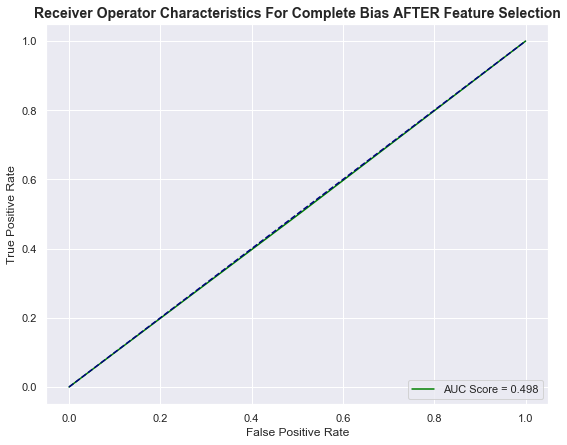

In [30]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr2, tpr2, thresholds2) = roc_curve(y_pred2, y_test_new)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score2 = auc(fpr2, tpr2)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr2, tpr2, color='green', label="AUC Score = {}".format(round(auc_score2, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()

<h3>Introducing Dropout In Between Layers</h3>

Train on 1785 samples, validate on 447 samples
Epoch 1/250
1785/1785 [==============================] - 1s 654us/step - loss: 0.6990 - acc: 0.5020 - val_loss: 0.6972 - val_acc: 0.4720
Epoch 2/250
1785/1785 [==============================] - 0s 80us/step - loss: 0.6949 - acc: 0.4986 - val_loss: 0.6939 - val_acc: 0.4832
Epoch 3/250
1785/1785 [==============================] - 0s 82us/step - loss: 0.6920 - acc: 0.5249 - val_loss: 0.6937 - val_acc: 0.4832
Epoch 4/250
1785/1785 [==============================] - 0s 85us/step - loss: 0.6943 - acc: 0.4997 - val_loss: 0.6939 - val_acc: 0.4832
Epoch 5/250
1785/1785 [==============================] - 0s 82us/step - loss: 0.6931 - acc: 0.5199 - val_loss: 0.6947 - val_acc: 0.4832
Epoch 6/250
1785/1785 [==============================] - 0s 83us/step - loss: 0.6933 - acc: 0.5137 - val_loss: 0.6944 - val_acc: 0.4855
Epoch 7/250
1785/1785 [==============================] - 0s 83us/step - loss: 0.6937 - acc: 0.4986 - val_loss: 0.6935 - val_acc: 0.4832


Epoch 120/250
1785/1785 [==============================] - 0s 79us/step - loss: 0.6925 - acc: 0.5154 - val_loss: 0.6969 - val_acc: 0.4653
Epoch 121/250
1785/1785 [==============================] - 0s 83us/step - loss: 0.6923 - acc: 0.5176 - val_loss: 0.6967 - val_acc: 0.4698
Epoch 122/250
1785/1785 [==============================] - 0s 86us/step - loss: 0.6932 - acc: 0.5126 - val_loss: 0.6963 - val_acc: 0.4743
Epoch 123/250
1785/1785 [==============================] - 0s 91us/step - loss: 0.6922 - acc: 0.5277 - val_loss: 0.6964 - val_acc: 0.4631
Epoch 124/250
1785/1785 [==============================] - 0s 94us/step - loss: 0.6927 - acc: 0.5148 - val_loss: 0.6959 - val_acc: 0.4653
Epoch 125/250
1785/1785 [==============================] - 0s 91us/step - loss: 0.6919 - acc: 0.5188 - val_loss: 0.6973 - val_acc: 0.4720
Epoch 126/250
1785/1785 [==============================] - 0s 90us/step - loss: 0.6927 - acc: 0.5154 - val_loss: 0.6979 - val_acc: 0.4609
Epoch 127/250
1785/1785 [=========

1785/1785 [==============================] - 0s 89us/step - loss: 0.6909 - acc: 0.5227 - val_loss: 0.6965 - val_acc: 0.4519
Epoch 239/250
1785/1785 [==============================] - 0s 79us/step - loss: 0.6913 - acc: 0.5160 - val_loss: 0.6966 - val_acc: 0.4609
Epoch 240/250
1785/1785 [==============================] - 0s 84us/step - loss: 0.6921 - acc: 0.5160 - val_loss: 0.6961 - val_acc: 0.4720
Epoch 241/250
1785/1785 [==============================] - 0s 88us/step - loss: 0.6909 - acc: 0.5193 - val_loss: 0.6969 - val_acc: 0.4541
Epoch 242/250
1785/1785 [==============================] - 0s 90us/step - loss: 0.6917 - acc: 0.5188 - val_loss: 0.6968 - val_acc: 0.4474
Epoch 243/250
1785/1785 [==============================] - 0s 91us/step - loss: 0.6921 - acc: 0.5238 - val_loss: 0.6966 - val_acc: 0.4407
Epoch 244/250
1785/1785 [==============================] - 0s 82us/step - loss: 0.6923 - acc: 0.5126 - val_loss: 0.6965 - val_acc: 0.4631
Epoch 245/250
1785/1785 [=======================

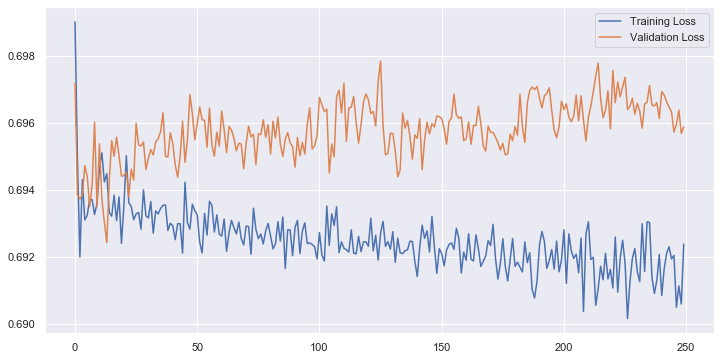

In [36]:
# Train-test splitting:
X_train_new2, X_test_new2, y_train_new2, y_test_new2 = train_test_split(X_new, y_new, test_size=0.2)

# Normalise training set first and map mean and variance of standardised training set onto the test set.
std_scale = StandardScaler().fit(X_train_new2)
X_train_new2 = std_scale.transform(X_train_new2)
X_test_new2 = std_scale.transform(X_test_new2)

# Importing libraries for machine learning via Keras:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

model_nn3 = Sequential()
model_nn3.add(Dense(38, activation='relu', input_dim=1))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(38, activation='relu'))
model_nn3.add(Dropout(0.2))
model_nn3.add(Dense(1, activation='sigmoid'))

model_nn3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

history = model_nn3.fit(X_train_new2, y_train_new2, validation_split=0.2, epochs=250)

# evaluate the model
_, train_acc = model_nn3.evaluate(X_train_new2, y_train_new2, verbose=0)
_, test_acc = model_nn3.evaluate(X_test_new2, y_test_new2, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
fig = plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Perform a prediction using model_nn:
y_pred3 = model_nn3.predict_classes(X_test_new2)

# Compute each metric:
acc3 = accuracy_score(y_pred3, y_test_new2)
recall3 = recall_score(y_pred3, y_test_new2)
precision3 = precision_score(y_pred3, y_test_new2)
f1_score3 = f1_score(y_pred3, y_test_new2)

# Print out the metrics:
print("Accuracy = {}".format(acc3))
print("Recall = {}".format(recall3))
print("Precision = {}".format(precision3))
print("F1 Score = {}".format(f1_score3))

Accuracy = 0.45878136200716846
Recall = 0.4639175257731959
Precision = 0.656934306569343
F1 Score = 0.5438066465256798


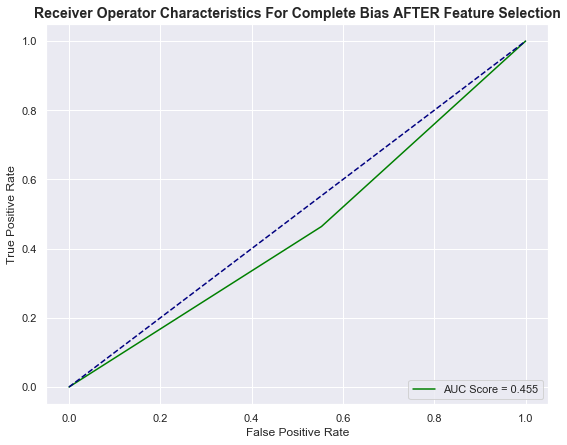

In [38]:
from sklearn.metrics import roc_curve, auc

# The the FPR and TPR from the roc_curve function:
(fpr3, tpr3, thresholds3) = roc_curve(y_pred3, y_test_new2)

# Compute the AUC (Area-Under-The-Curve) Score:
auc_score3 = auc(fpr3, tpr3)

# Plotting the AUC-ROC curve:
fig, ax = plt.subplots(figsize=(9,7))
plt.title("Receiver Operator Characteristics For Complete Bias AFTER Feature Selection", fontsize=14, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
ax.plot(fpr3, tpr3, color='green', label="AUC Score = {}".format(round(auc_score3, 3)))
ax.plot([0,1], [0,1], color='navy', linestyle='--')
plt.legend(loc='lower right')
plt.show()